In [187]:
import pandas as pd
import FinanceDataReader as fdr
import datetime
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'

In [209]:
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

df = fdr.DataReader('019490', start, end)
df

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2019-04-01,3575,3860,3520,3670,9306,0.026573
2019-04-02,3700,3750,3650,3710,4902,0.010899
2019-04-03,3710,3765,3665,3750,6402,0.010782
2019-04-04,3750,3790,3705,3770,1673,0.005333
2019-04-05,3770,3800,3695,3785,8506,0.003979
...,...,...,...,...,...,...
2020-03-26,1890,2000,1885,1885,16501,-0.002646
2020-03-27,1885,2040,1885,1940,15066,0.029178
2020-03-30,1930,2090,1920,2020,21730,0.041237


<AxesSubplot: xlabel='Date'>

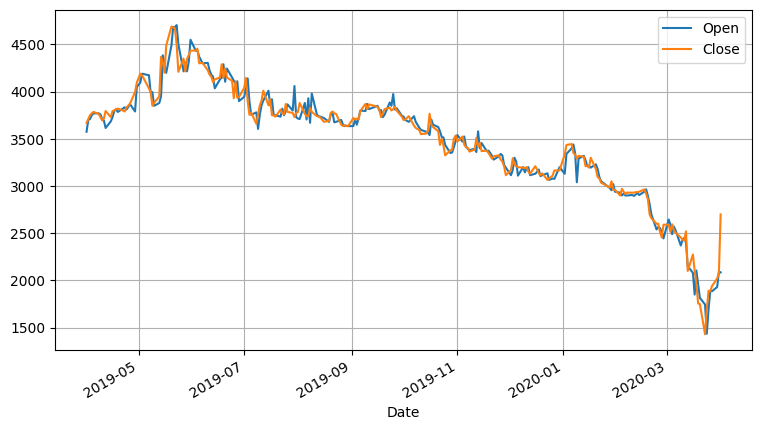

In [143]:
df.plot(y = ['Open', 'Close'], figsize = [9,5], grid = True)

In [144]:
# 누적 수익률 계산
df['St_rtn'] = (1 + df['Change']).cumprod()

In [145]:
df

,Open,High,Low,Close,Volume,Change,St_rtn
Date,,,,,,,
2019-04-01,3575,3860,3520,3670,9306,0.026573,1.026573
2019-04-02,3700,3750,3650,3710,4902,0.010899,1.037762
2019-04-03,3710,3765,3665,3750,6402,0.010782,1.048951
2019-04-04,3750,3790,3705,3770,1673,0.005333,1.054545
2019-04-05,3770,3800,3695,3785,8506,0.003979,1.058741
...,...,...,...,...,...,...,...
2020-03-26,1890,2000,1885,1885,16501,-0.002646,0.527273
2020-03-27,1885,2040,1885,1940,15066,0.029178,0.542657
2020-03-30,1930,2090,1920,2020,21730,0.041237,0.565035


<AxesSubplot: xlabel='Date'>

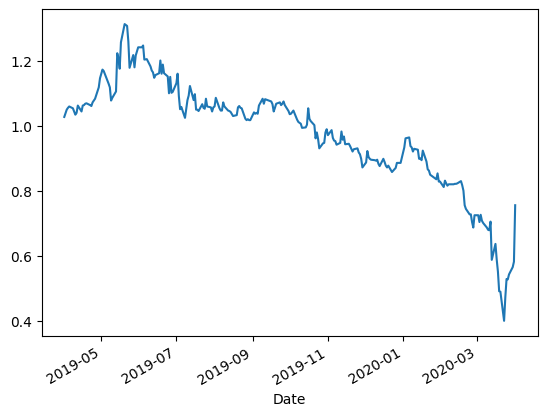

In [146]:
df['St_rtn'].plot()

<AxesSubplot: xlabel='Date'>

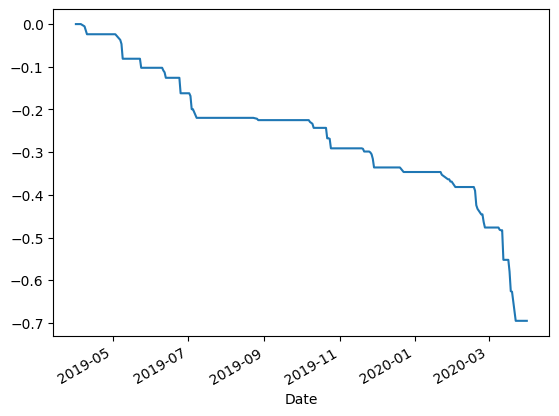

In [147]:
# cummax() -> 기준가에서 최고가 저장
# cummin() -> 기준가에서 최저가 저장

historical_max = df['Close'].cummax()
daily_drawdown = df['Close'] / historical_max - 1.0
# 최대 낙폭
historical_min = daily_drawdown.cummin()
historical_min.plot()

In [148]:
# CAGR, MDD, VOL, sharpe 출력
# CAGR : 일별 date 사용 -> 전체 연도를 계산하는 경우 영업일 기간을 252일 기준으로 나눈 역수 제곱한 후 -1
# MDD : 최대 낙폭
# VOL : 연 주가 수익률 표준편차 = 일별 주가 수익률 * 252일 제곱근
# sharpe : 총 위험 1단위당 초과 수익률

CAGR = df.loc[end, 'St_rtn'] ** (252/len(df)) - 1
MDD = historical_min.min()
VOL = np.std(df['Change'] * np.sqrt(252))
sharpe = np.mean(df['Change'])/np.std(df['Change'])*np.sqrt(252)

In [149]:
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

CAGR :  -24.64 %
Sharpe :  -0.19
VOL :  58.91 %
MDD :  69.51 %


In [169]:
# For backtesting, bring KOSPI index during the time between 2019-04-01 to 2020-04-01

start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 2)

kospi = fdr.DataReader('ks11', start, end)
kospi

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-04-01,2153.310059,2171.489990,2153.310059,2168.280029,2168.280029,263300
2019-04-02,2177.199951,2181.370117,2171.840088,2177.179932,2177.179932,257500
2019-04-03,2176.810059,2203.290039,2172.830078,2203.270020,2203.270020,358600
2019-04-04,2201.040039,2216.149902,2198.659912,2206.530029,2206.530029,431000
2019-04-05,2206.360107,2214.820068,2205.260010,2209.610107,2209.610107,517200
...,...,...,...,...,...,...
2020-03-26,1699.109985,1735.750000,1679.229980,1686.239990,1686.239990,992500
2020-03-27,1756.069946,1759.050049,1668.209961,1717.729980,1717.729980,1077500
2020-03-30,1670.339966,1729.630005,1659.949951,1717.119995,1717.119995,767800


In [170]:
# 종가만 사용
kospi_1 = kospi[['Close']]

In [171]:
# 일별 kospi 수익률 계산
kospi_1['Daily_rtn'] = kospi_1['Close'].pct_change()

C:\Users\seopa\AppData\Local\Temp\ipykernel_9792\849067883.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_1['Daily_rtn'] = kospi_1['Close'].pct_change()


In [172]:
kospi_1.head()

,Close,Daily_rtn
Date,,
2019-04-01,2168.280029,NaN
2019-04-02,2177.179932,0.004105
2019-04-03,2203.270020,0.011983
2019-04-04,2206.530029,0.001480
2019-04-05,2209.610107,0.001396


In [173]:
# 일별 수익률로 총 수익률 계산
kospi_1['St_rtn'] = (1 + kospi_1['Daily_rtn']).cumprod()

C:\Users\seopa\AppData\Local\Temp\ipykernel_9792\1760231446.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  kospi_1['St_rtn'] = (1 + kospi_1['Daily_rtn']).cumprod()


In [175]:
# KOSPI CAGR, MDD, VOL, sharpe 출력
# CAGR : 일별 date 사용 -> 전체 연도를 계산하는 경우 영업일 기간을 252일 기준으로 나눈 역수 제곱한 후 -1
# MDD : 최대 낙폭
# VOL : 연 주가 수익률 표준편차 = 일별 주가 수익률 * 252일 제곱근
# sharpe : 총 위험 1단위당 초과 수익률

CAGR = kospi_1.loc[datetime.datetime(2020,4,1), 'St_rtn'] ** (252/len(kospi_1)) - 1
MDD = historical_min.min()
VOL = np.std(kospi_1['Daily_rtn'] * np.sqrt(252))
sharpe = np.mean(kospi_1['Daily_rtn'])/np.std(kospi_1['Daily_rtn'])*np.sqrt(252)

In [176]:
print('CAGR : ', round(CAGR*100, 2), '%')
print('Sharpe : ', round(sharpe, 2))
print('VOL : ', round(VOL*100, 2), '%')
print('MDD : ', round(-1*MDD*100, 2), '%')

CAGR :  -22.42 %
Sharpe :  -0.93
VOL :  24.27 %
MDD :  69.51 %


#### 하이트론 의 cagr, sharpe 지수, 변동성, 맥스드로우다운

- CAGR :  -24.64 %       
- Sharpe :  -0.19
- VOL :  58.91 %
- MDD :  69.51 %

#### kospi 지수의 cagr, sharpe 지수, 변동성, 맥스드로우다운 

- CAGR :  -22.42 %
- Sharpe :  -0.93
- VOL :  24.27 %
- MDD :  69.51 %

In [139]:
kospi_1

,Close,Daily_rtn,St_rtn
Date,,,
2019-04-01,2168.280029,NaN,NaN
2019-04-02,2177.179932,0.004105,1.004105
2019-04-03,2203.270020,0.011983,1.016137
2019-04-04,2206.530029,0.001480,1.017641
2019-04-05,2209.610107,0.001396,1.019061
...,...,...,...
2020-03-25,1704.760010,0.058877,0.786227
2020-03-26,1686.239990,-0.010864,0.777686
2020-03-27,1717.729980,0.018675,0.792209


In [16]:
invest = pd.read_csv('./pred1signal0.csv', )

In [48]:
invest.head()

,Unnamed: 0,회계년도,거래소코드,PBR,PER,기업규모코드,매출액,매출액순이익률,매출액증가율,성장비용,...,자기자본회전률,종가,주당순손익,총자본회전률,회사명,부채자본비율,현금흐름스코어,수익률,투자신호,PEG
0,4,2018,1940,0.290,13.505,30.0,1.314755e+09,2.76,7.66,0.0,...,1.04,13750.0,0.0,0.87,KISCO홀딩스(주),0.018116,2,-6.909091,0,-0.266356
1,7,2018,24120,0.710,5.745,30.0,1.518638e+08,8.40,-7.55,0.0,...,1.69,5410.0,0.0,1.03,KB오토시스(주),0.454741,2,14.232902,1,0.808637
2,18,2018,64960,0.880,10.465,30.0,1.058426e+09,5.41,-6.95,0.0,...,1.28,27050.0,0.0,0.87,SNT모티브(주),0.430875,2,58.040665,1,-0.894863
3,19,2018,3570,0.395,14.295,30.0,3.962591e+08,5.00,-9.17,0.0,...,0.65,7200.0,733.0,0.47,SNT중공업(주),0.362920,2,-8.194444,0,-0.831118
4,20,2018,71970,0.815,0.000,30.0,2.148077e+08,-48.75,-14.91,5369544.0,...,1.43,5670.0,-1808.0,0.33,STX중공업(주),2.689555,1,-46.119929,0,1000.000000


In [58]:
def padding(x):
    return x.rjust(6, "0")

In [59]:
invest['거래소코드'] = invest['거래소코드'].astype('str')
invest['거래소코드'] = invest['거래소코드'].map(padding)

In [69]:
peg = invest[(invest['PEG'] > 0) & (invest['PEG'] <= 1)]

In [76]:
sorted_peg = peg.sort_values(by='PEG', ascending=True)
sorted_peg['거래소코드'].head(10)

53     029460
72     002200
79     045300
87     010280
32     039020
138    009160
16     000210
43     131290
23     006580
17     104460
Name: 거래소코드, dtype: object

In [201]:
def get_return_sl(code, short, long):
    
    # 백테스팅 기간 : 2019.04.01 ~ 2020.04.01
    start = datetime.datetime(2019, 4, 1)
    end = datetime.datetime(2020, 4, 1)

    df = fdr.DataReader(code, start, end)
    df = df[['Close']].copy()

    df['ma1'] = df['Close'].rolling(short).mean().shift(1)
    df['ma2'] = df['Close'].rolling(long).mean().shift(1)

    df['action'] = np.where(df['ma1'] > df['ma2'], 'buy', 'sell')

    df.iloc[-1, -1] = 'sell'

    cond1 = ( df['action'] == 'buy') & ( df['action'].shift(1) == 'sell')
    cond2 = ( df['action'] == 'sell') & ( df['action'].shift(1) == 'buy')

    df_buy = df[cond1].reset_index()
    df_buy.columns = ['날짜', '종가(buy)', '이평20일', '이평60일', '결정']

    df_sell = df[cond2].reset_index()
    df_sell.columns = ['날짜', '종가(sell)', '이평20일', '이평60일', '결정']

    df_result = pd.concat([df_buy, df_sell], axis = 1)

    df_result['수익률'] = df_result['종가(sell)'] / df_result['종가(buy)'] 

    df_final = (df_result[['수익률']].cumprod().tail(1) -1)*100

    df_final['단기 이평'] = short
    df_final['장기 이평'] = long

    return df_final

In [202]:
invest_list = ['029460', '002200', '045300', '010280' , '039020', '009160', '000210', '131290', '006580', '104460']

dfs = list()
for i in invest_list:
    dfs.append(get_return_sl(i, 20 ,60))
df_result = pd.concat(dfs)
df_result.reset_index(drop=True, inplace=True)
print(sum(df_result["수익률"])/10)
df_result

-4.920248325398054


,수익률,단기 이평,장기 이평
0,-9.918352,20,60
1,-12.997831,20,60
2,-8.181075,20,60
3,-36.203418,20,60
4,-2.527076,20,60
5,-27.278048,20,60
6,-10.593940,20,60
7,66.458073,20,60
8,-24.737132,20,60
9,16.776316,20,60


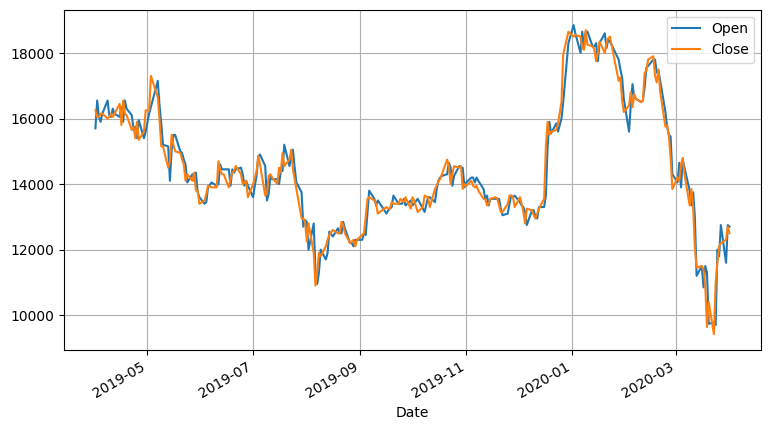

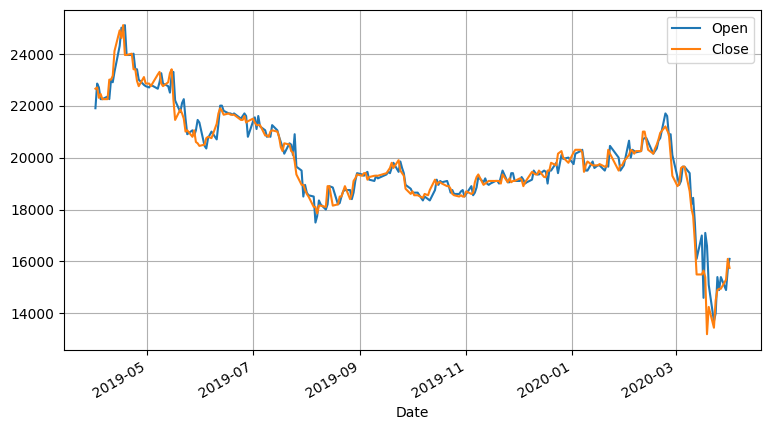

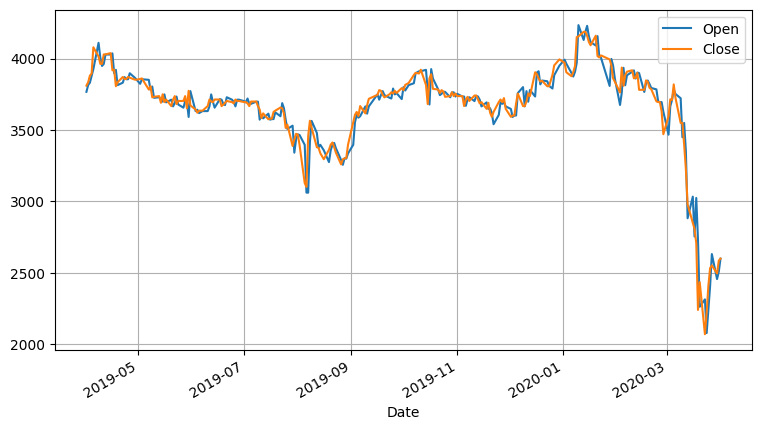

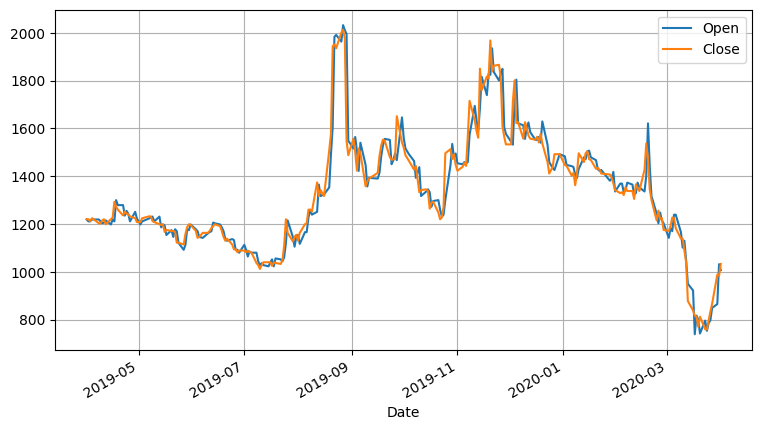

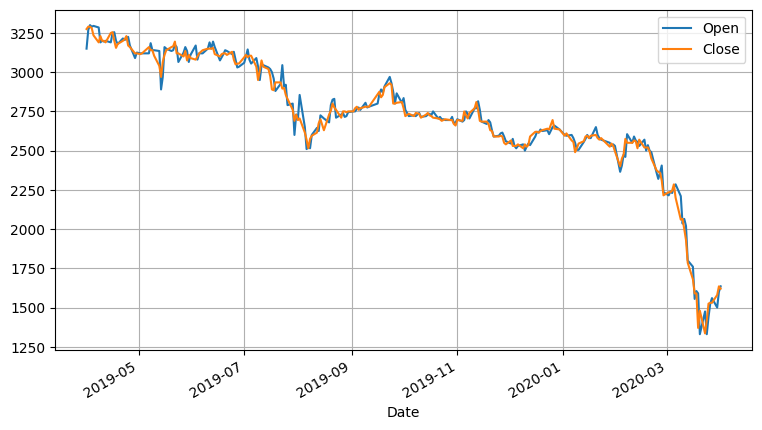

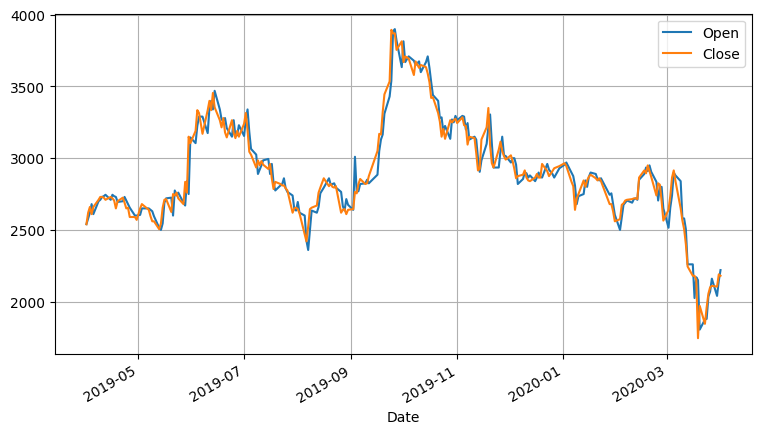

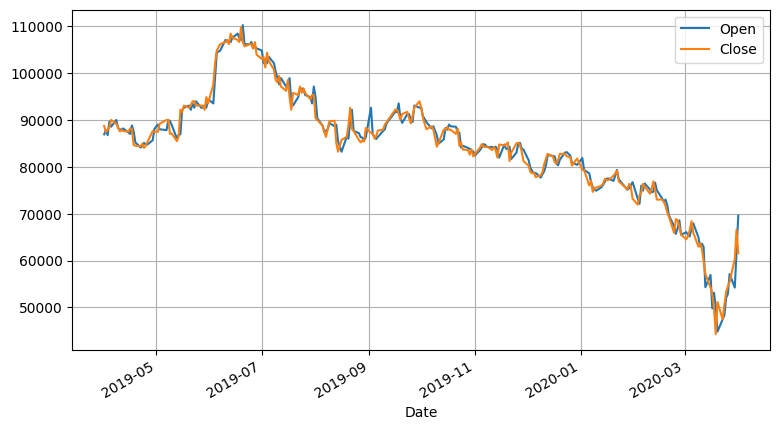

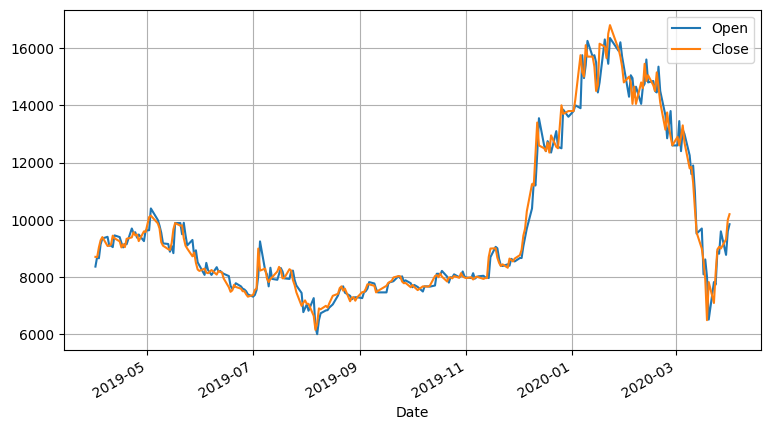

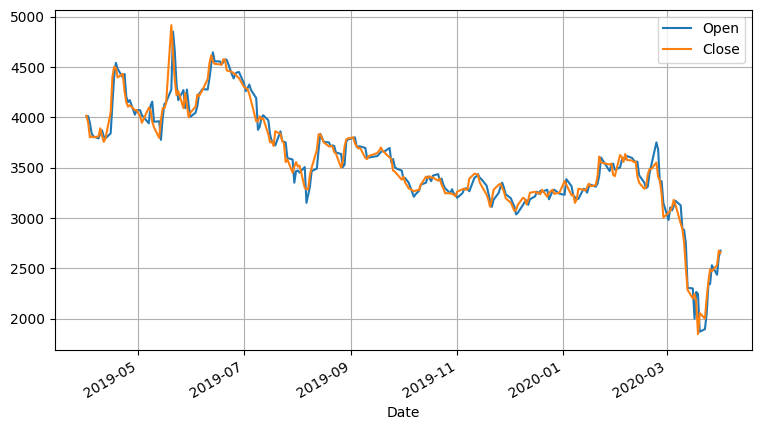

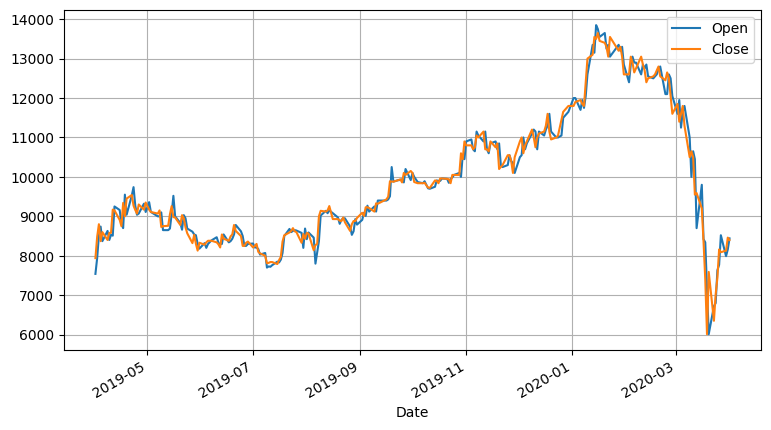

In [114]:
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

for i in invest_list:
    stock = fdr.DataReader(i, start, end)
    stock.plot(y = ['Open', 'Close'], figsize = [9,5], grid = True)

In [179]:
# 최적이평선 찾기
dfs = []
for short in range(3, 11):
    for long in range(30, 61):
        df = get_return_sl('006650', short, long)
        dfs.append(df)

df_result = pd.concat(dfs)
df_result.sort_values(by = '수익률', ascending = False)

,수익률,단기 이평,장기 이평
4,-6.111686,8,31
1,-8.064516,4,45
1,-8.064516,4,44
1,-8.442851,3,47
1,-8.442851,3,48
...,...,...,...
1,-25.001511,10,39
1,-25.001511,10,38
1,-25.992969,10,44
1,-25.992969,10,43


In [210]:
# 백테스팅 기간 : 2019.04.01 ~ 2020.4.1
start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df["KOSPI_수익률"] = kospi_df["Close"]/kospi_df["Close"][0] - 1
kospi_df["KOSPI_수익률"] = kospi_df["KOSPI_수익률"]*100
kospi_df

,Open,High,Low,Close,Adj Close,Volume,KOSPI_수익률
Date,,,,,,,
2019-04-01,2153.310059,2171.489990,2153.310059,2168.280029,2168.280029,263300,0.000000
2019-04-02,2177.199951,2181.370117,2171.840088,2177.179932,2177.179932,257500,0.410459
2019-04-03,2176.810059,2203.290039,2172.830078,2203.270020,2203.270020,358600,1.613721
2019-04-04,2201.040039,2216.149902,2198.659912,2206.530029,2206.530029,431000,1.764071
2019-04-05,2206.360107,2214.820068,2205.260010,2209.610107,2209.610107,517200,1.906123
...,...,...,...,...,...,...,...
2020-03-25,1668.189941,1707.640015,1645.280029,1704.760010,1704.760010,872800,-21.377313
2020-03-26,1699.109985,1735.750000,1679.229980,1686.239990,1686.239990,992500,-22.231448
2020-03-27,1756.069946,1759.050049,1668.209961,1717.729980,1717.729980,1077500,-20.779145


<AxesSubplot: xlabel='Date'>

c:\Users\seopa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\events.py:89: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  func(*args, **kwargs)
c:\Users\seopa\AppData\Local\Programs\Python\Python311\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 8722 (\N{MINUS SIGN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


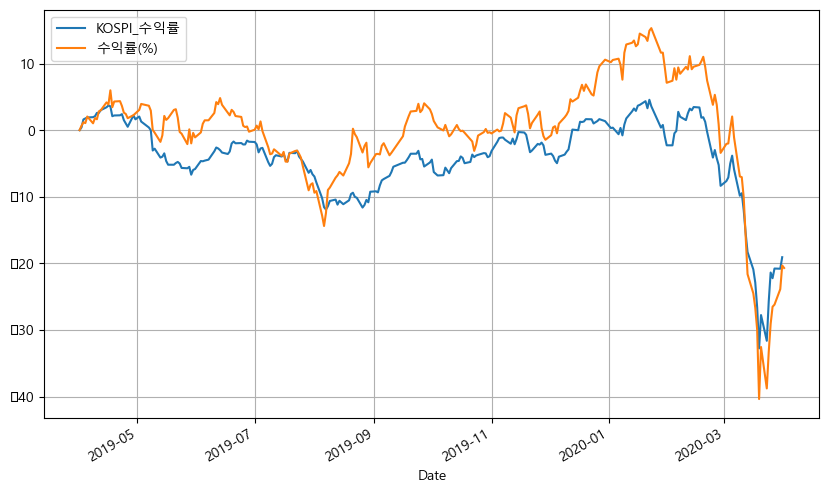

In [211]:
invest_list = ['029460', '002200', '045300', '010280' , '039020', '009160', '000210', '131290', '006580', '104460']

df_compare = pd.DataFrame()

for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

for i in invest_list:
    df_compare[i] = df_compare[i]/df_compare[i][0] - 1


df_compare["수익률(%)"] = df_compare[invest_list[0]]

for i in invest_list:
    df_compare["수익률(%)"] = df_compare[i] + df_compare["수익률(%)"]
df_compare["수익률(%)"] = df_compare["수익률(%)"] - df_compare[invest_list[0]]
df_compare["수익률(%)"] = df_compare["수익률(%)"]/10
df_compare["수익률(%)"] = df_compare["수익률(%)"]*100

df_plot0 = pd.concat([kospi_df, df_compare],axis=1)
df_plot0.plot(y = ["KOSPI_수익률", "수익률(%)"], figsize = [10,6], grid = True)

In [212]:
MDD_list = []
def DD(data):
    data["전고점"] = data["sum"].cummax()
    data["DD"] = (1-data["sum"]/data["전고점"])*100
    MDD = data["DD"].max()
    return MDD

VOL_list = []
SHARP_list = []

def replace_0(x):
    if x > 0 :
        return 0
    else:
        return x

In [215]:
# 포트폴리오 DD, Volatility, Sharp ratio
invest_list = ['029460', '002200', '045300', '010280' , '039020', '009160', '000210', '131290', '006580', '104460']
df_compare = pd.DataFrame()
for i in invest_list:
    df_compare[i] = fdr.DataReader(i, start, end)["Close"]

df_compare["sum"] = df_compare[invest_list[0]]
for i in invest_list:
    df_compare["sum"] = df_compare[i] + df_compare["sum"]
df_compare["sum"] = df_compare["sum"] - df_compare[invest_list[0]]

MDD_list.append(round(DD(df_compare),2))


df_compare["전날대비수익률"] = (df_compare["sum"] - df_compare["sum"].shift(1))/df_compare["sum"]
VOL = np.std(df_compare["전날대비수익률"]) * np.sqrt(len(df_compare["전날대비수익률"]))
SHARP = (-4.9 - 1.5)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(df_compare))
print("VOL = ", VOL)
print("SHARP = ", SHARP / 100)

DD =  50.69596492314273
VOL =  0.35823460077889935
SHARP =  -0.1786538761494468


In [216]:
# kospi DD, Volatility, Sharp ratio

start = datetime.datetime(2019, 4, 1)
end = datetime.datetime(2020, 4, 1)

kospi_df = fdr.DataReader("KS11", start, end)
kospi_df.columns = ['sum', 'Open', 'High', 'Low', 'Volume', 'Change']

MDD_list.append(round(DD(kospi_df),2))


kospi_df["전날대비수익률"] = (kospi_df["sum"] - kospi_df["sum"].shift(1))/kospi_df["sum"]
VOL = np.std(kospi_df["전날대비수익률"]) * np.sqrt(len(kospi_df["전날대비수익률"]))
SHARP = (-19.0 - 1.5)/VOL
VOL_list.append(VOL)
SHARP_list.append(SHARP)


print("DD = ", DD(kospi_df))
print("VOL = ", VOL)
print("SHARP = ", SHARP / 100)


DD =  34.80414461339607
VOL =  0.2663434813783617
SHARP =  -0.769682813106965
